Sample of the dataset:
     MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
214      4.6     15.7       0.0          1.0       0.6         NNE   
115     12.0     23.8       0.0         10.4      12.4          NW   
200     -2.7     18.1       0.0          2.2       9.3           W   
310      6.3     16.1       0.0          1.8       2.9           S   
336      5.6     27.6       0.0          5.2      11.0          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
214           15.0        SSE        NNE           6.0  ...           67   
115           44.0         NW        WNW          15.0  ...           34   
200           52.0        NaN        WNW           0.0  ...           36   
310           35.0          S          S          19.0  ...           33   
336           46.0        NNW         NW          15.0  ...           21   

     Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
214       1030.3       1027.

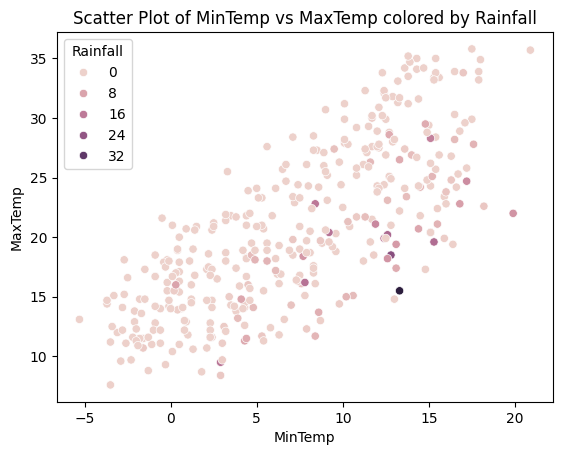

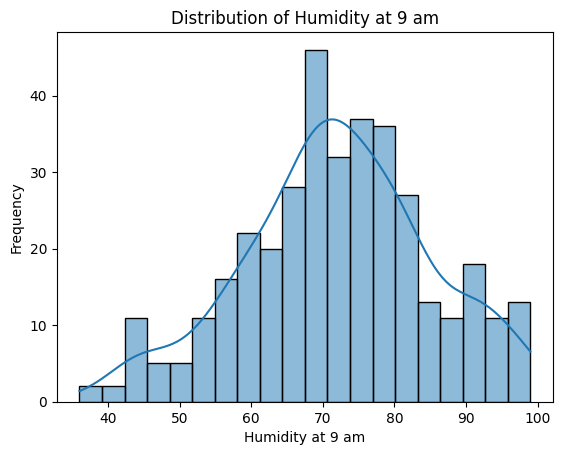

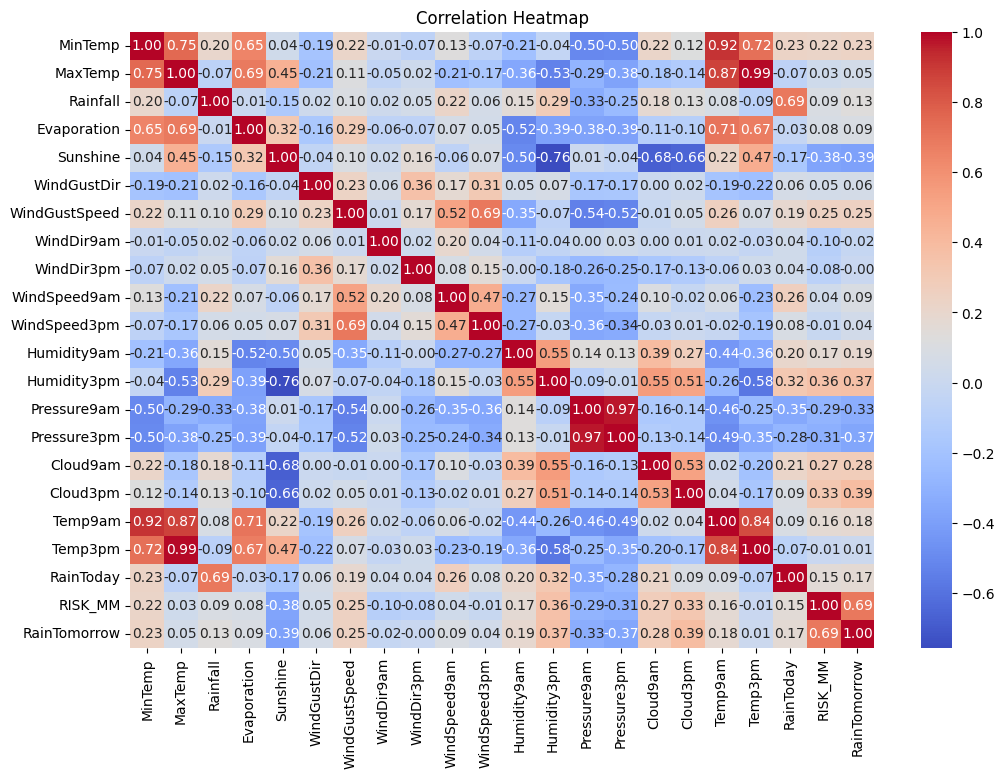

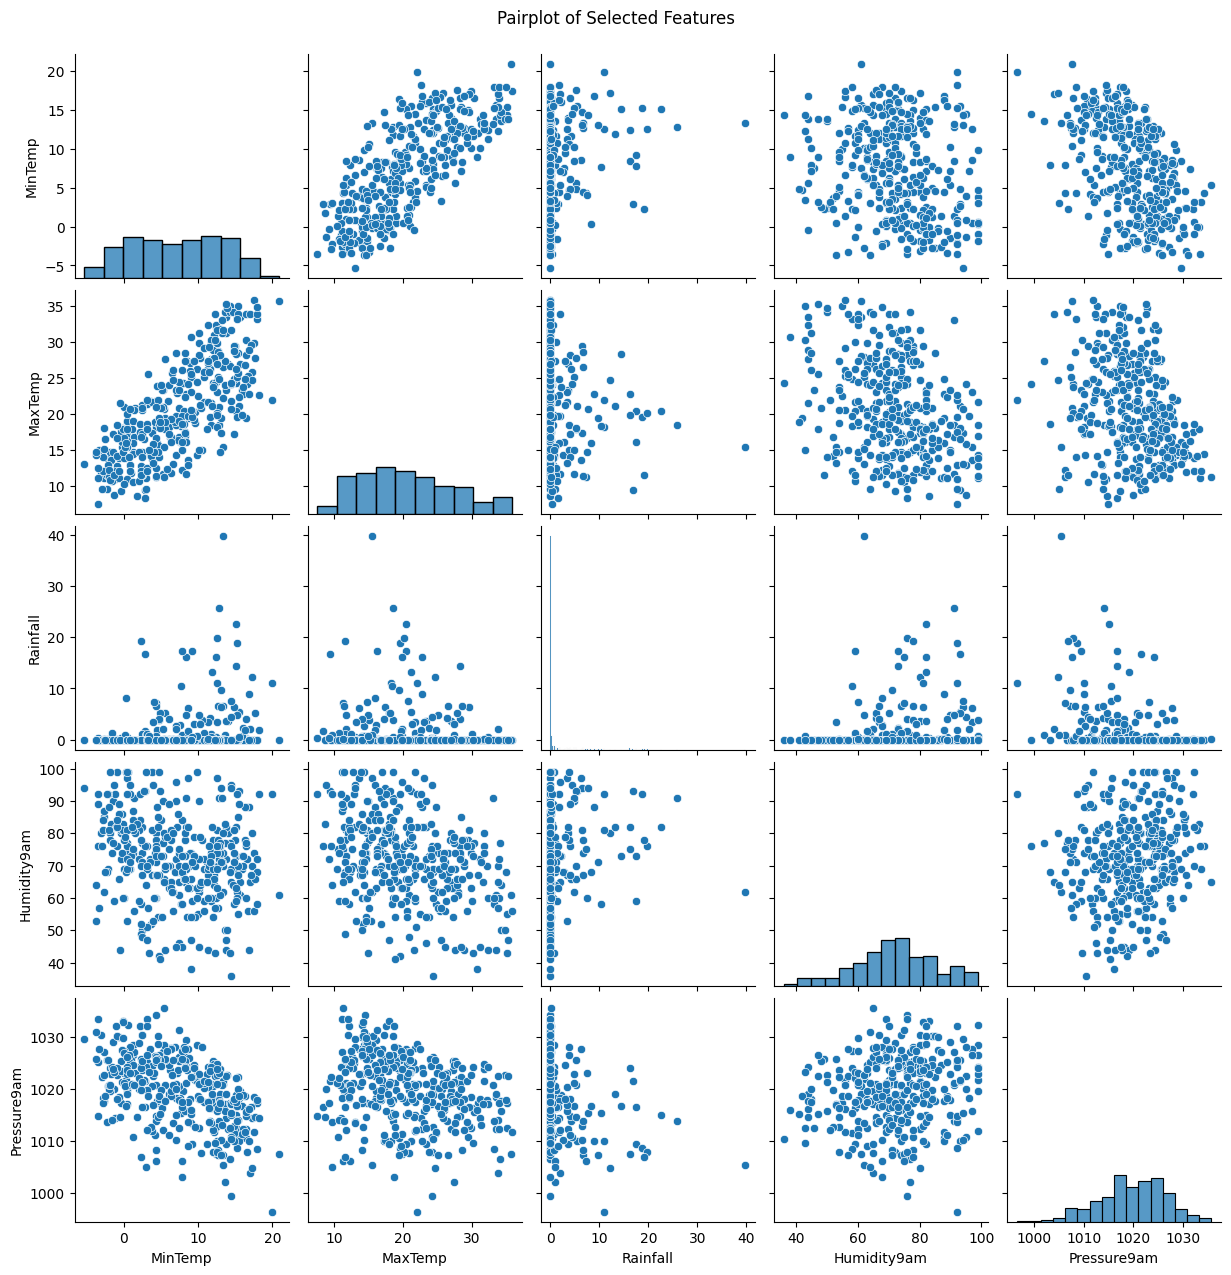

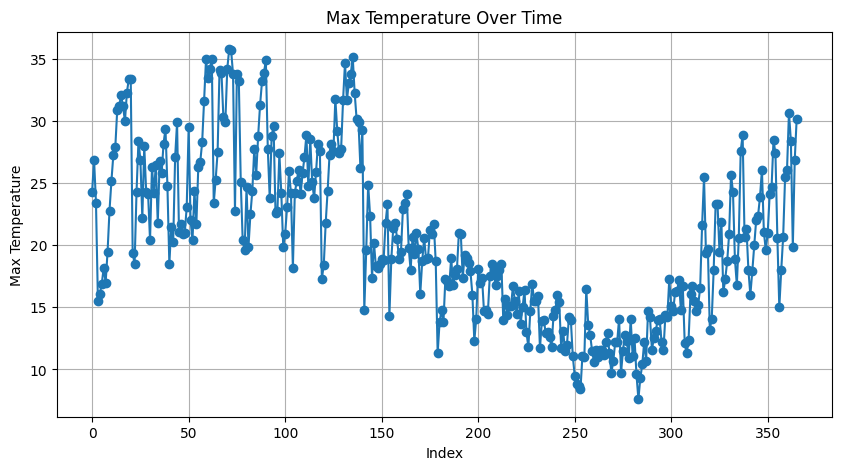

Mean Squared Error for Rainfall Prediction: 35.62484799957957
Highest rainfall index: 3, Value: 39.8
Lowest rainfall index: 0, Value: 0.0


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Load the Data
df = pd.read_csv('/content/weather.csv')

# Step 2: Data Exploration
print("Sample of the dataset:")
print(df.sample(5))
print("\nDataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Step 3: Data Cleaning
# Convert non-numeric columns to numeric or encode them
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.Categorical(df[col]).codes  # Encode strings as numeric categories

# Handle missing values by filling with the mean (or other strategy)
df.fillna(df.mean(), inplace=True)

# Step 4: Data Visualization
sns.scatterplot(data=df, x='MinTemp', y='MaxTemp', hue='Rainfall')
plt.title('Scatter Plot of MinTemp vs MaxTemp colored by Rainfall')
plt.show()

sns.histplot(df['Humidity9am'], bins=20, kde=True)
plt.title('Distribution of Humidity at 9 am')
plt.xlabel('Humidity at 9 am')
plt.ylabel('Frequency')
plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

selected_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Pressure9am']
sns.pairplot(df[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Step 5: Data Visualization (Part 2)
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['MaxTemp'], marker='o')
plt.xlabel('Index')
plt.ylabel('Max Temperature')
plt.title('Max Temperature Over Time')
plt.grid(True)
plt.show()

# Step 6: Advanced Analysis (Predict Rainfall)
# Prepare the data for prediction
X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions and calculate the Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')

# Step 7: Insights
# Identify the highest and lowest rainfall indices
highest_rainfall_index = df['Rainfall'].idxmax()
lowest_rainfall_index = df['Rainfall'].idxmin()

print(f'Highest rainfall index: {highest_rainfall_index}, Value: {df.loc[highest_rainfall_index, "Rainfall"]}')
print(f'Lowest rainfall index: {lowest_rainfall_index}, Value: {df.loc[lowest_rainfall_index, "Rainfall"]}')
